In [1]:
# =
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import TensorBoard
import shutil, os, datetime as dt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, minmax_scale
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/Advertising.csv')
print(data.head(3))
del data['no']
print(data.head(3))

fdata = data[['tv', 'radio', 'newspaper']]
ldata = data[['sales']]
print(fdata[:2])
print(ldata[:2])

# 정규화
# scaler = MinMaxScaler(feature_range=(0, 1))
# fedata = scaler.fit_transform(fdata)
# print(fedata[:2])

fedata = minmax_scale(fdata, axis = 0, copy = True) # 원본 보존
print(fedata[:2])

# train / test
x_train, x_test, y_train, y_test = train_test_split(fedata, ldata, test_size = 0.3, random_state = 123)

model = Sequential()
model.add(Input(shape = (3,)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
# print(model.summary())
# tf.keras.utils.plot_model(model, 'tf13.png')

history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 0, validation_split = 0.2) # validation_data = (x_vali, y_vali)


   no     tv  radio  newspaper  sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
      tv  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
      tv  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
   sales
0   22.1
1   10.4
[[0.77578627 0.76209677 0.60598065]
 [0.1481231  0.79233871 0.39401935]]
loss :  7.871464252471924


loss :  7.871464252471924
history :  {'loss': [208.88720703125, 208.17018127441406, 207.46792602539062, 206.78822326660156, 206.0966796875, 205.41921997070312, 204.7397003173828, 204.0572052001953, 203.35592651367188, 202.64378356933594, 201.92562866210938, 201.18551635742188, 200.41372680664062, 199.66441345214844, 198.83731079101562, 198.02662658691406, 197.1624755859375, 196.28195190429688, 195.3916778564453, 194.44100952148438, 193.427001953125, 192.4370880126953, 191.3912353515625, 190.2865753173828, 189.129150390625, 187.9388427734375, 186.72427368164062, 185.37448120117188, 184.04910278320312, 182.6011505126953, 181.1077423095703, 179.5425262451172, 177.85508728027344, 176.13536071777344, 174.3157501220703, 172.3406524658203, 170.3215789794922, 168.211181640625, 165.9589080810547, 163.6527862548828, 161.25314331054688, 158.65347290039062, 156.0605926513672, 153.35057067871094, 150.54530334472656, 147.57176208496094, 144.60279846191406, 141.3714141845703, 138.1490478515625, 134.8

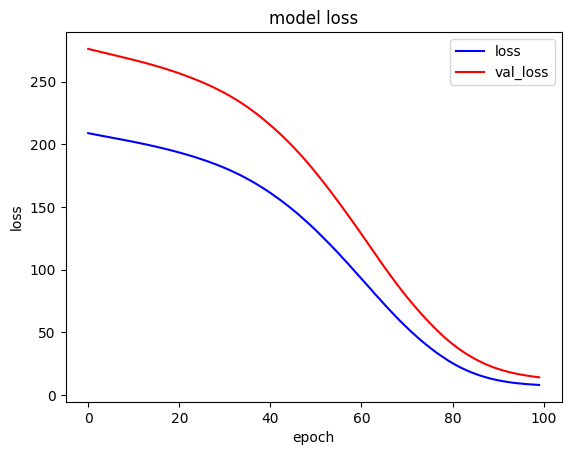

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
r2_score :  0.701553225517273


In [23]:

# 모델 평가 점수
loss = model.evaluate(x_test, y_test, verbose = 0)
print('loss : ', loss[0])

# history 값
print('history : ',history.history)
print('loss : ',history.history['loss'])
print('mse : ', history.history['mse'])
print('val_loss : ', history.history['val_loss'])
print('val_mse : ', history.history['val_mse'])

# loss 시각화
plt.plot(history.history['loss'], color = 'b', label = 'loss')
plt.plot(history.history['val_loss'], color = 'r',label = 'val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('r2_score : ', r2_score(y_test, model.predict(x_test)))